In [40]:
import time
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import matplotlib.pyplot as plt  # позволяет рисовать графики, выдает картинку
import numpy as np
%matplotlib inline

In [41]:
def visualize_runtimes(results, title):
    start, stop = np.array(results).T
    plt.barh(range(len(start)), stop - start, left=start)  # настраивает координаты, которые будет прорисовывать
    plt.grid(axis='x')
    plt.ylabel("Tasks")  # вертикально отображ. кол-во тасков, один за одним, которые выполнялись
    plt.xlabel("Seconds")  # горизонтально отображ. время за которое они выполнялись
    plt.title(title)
    return stop[-1] - start[0]

def multithreading(func, args, workers):  # Выполняет потоки
    begin_time = time.time()
    with ThreadPoolExecutor(
            max_workers=workers) as executor:
        # workers - кол-во потоков, которые будут запустить одновременно. Для распред. между ними задачу
        res = executor.map(func, args, [begin_time for i in range(len(args))])
        # для каждого выполнится executor, метод map добавит все результаты в общий список
    return list(res)


def multiprocessing(func, args, workers):  # Выполняет процессы
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)

In [43]:
def calculate_fibo(number, base):
    start = time.time() - base
    try:
        fibo = []
        a, b = 1, 1
        fibo.append(a)
        for i in range(number - 1):
            a, b = b, a + b
            fibo.append(a)
    except Exception as e:
        print('ERROR: %s' % e)
    stop = time.time() - base
    return start, stop

In [50]:
numbers = [25000, 40000, 80000]

In [51]:
%timeit -n 1 [calculate_fibo(number, 2) for number in numbers]
# каждый запуск calculate_fibo, запустит свой ThreadExecutor, передаст туда данные и покажет как долго он работал
# %timeit - замеряет время работы скрипта(магический метод Jupyter)

695 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.759099006652832

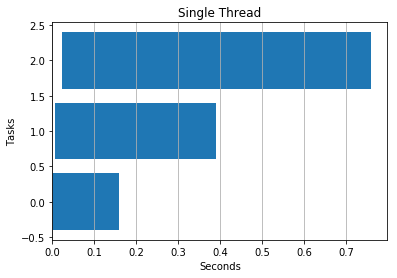

In [52]:
visualize_runtimes(multithreading(calculate_fibo, numbers, 10), "Single Thread")
# 10 - указывается кол-во потоков
# Задания которые приходили и сколько они выполнялись